In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
vg = pd.read_csv(r"/home/rgukt/Downloads/vgsales.csv")
vg.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [90]:
vg["Rank"].is_monotonic_increasing
vg["Rank"].nunique()

16598

In [91]:
vg.shape

(16598, 11)

In [92]:
vg.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [93]:
# How many games are in the dataset?
vg.shape[0]

16598

In [94]:
vg["Name"].unique()
vg["Name"].nunique()
vg["Name"].value_counts().values.sum()


np.int64(16598)

In [95]:
vg[vg["Name"]=="Need for Speed: Most Wanted"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


In [96]:
# What are the top 5 platforms with the most games?
vg["Platform"].value_counts().head(5)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64

In [97]:
# Which genres are most common?
vg["Genre"].value_counts().head(5)

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: count, dtype: int64

In [98]:
# Are there any missing values? If yes, how many per column?
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [99]:
# Which game sold the most globally?
vg.head(3)
vg[vg["Global_Sales"]==vg["Global_Sales"].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [100]:
# Which genre has the highest average global sales?
vg.groupby("Genre")["Global_Sales"].mean().sort_values(ascending=False).index[0]

'Platform'

In [101]:
# Which publisher has published the most games?
vg["Publisher"].value_counts().index[0]

'Electronic Arts'

In [102]:
vg.groupby("Publisher")["Name"].count().sort_values(ascending=False)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
iWin                               1
fonfun                             1
Valve                              1
Universal Gamex                    1
Michaelsoft                        1
Name: Name, Length: 578, dtype: int64

In [103]:
# Find the total sales per region.
vg.head(2)
NA_sales=vg["NA_Sales"].sum()
EU_sales =vg["EU_Sales"].sum()
JP_Sales=vg["JP_Sales"].sum()
Other_Sales=vg["Other_Sales"].sum()

In [104]:
print(NA_sales)
print(EU_sales)
print(JP_Sales)
print(Other_Sales)

4392.950000000001
2434.1299999999997
1291.0200000000002
797.7500000000001


In [105]:
vg.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [106]:
# Compare sales between NA and EU — which sold more on average?
avg_sales=vg[["NA_Sales","EU_Sales"]].mean()
avg_sales

NA_Sales    0.264667
EU_Sales    0.146652
dtype: float64

(array([0, 1]), [Text(0, 0, 'NA_Sales'), Text(1, 0, 'EU_Sales')])

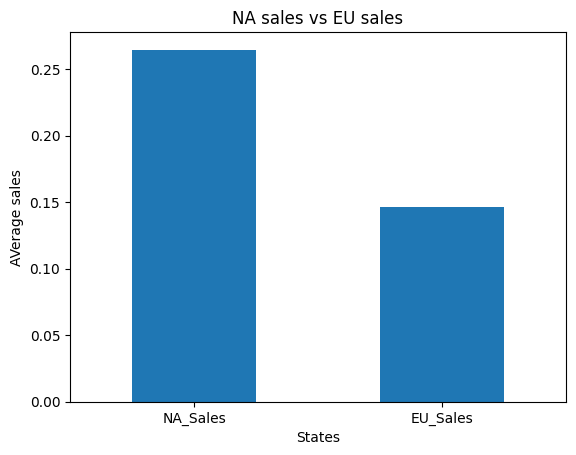

In [107]:
avg_sales.plot(kind="bar")
plt.xlabel("States")
plt.ylabel("AVerage sales")
plt.title("NA sales vs EU sales")
plt.xticks(rotation=0)

<Axes: >

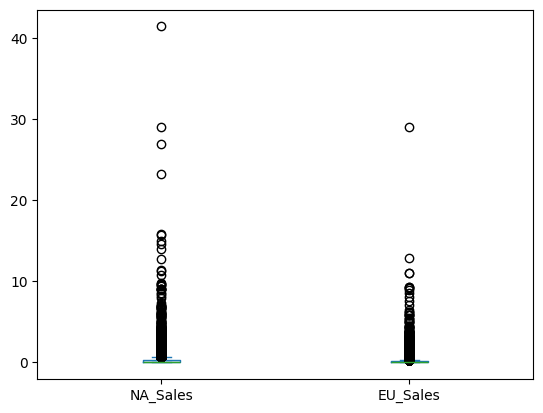

In [108]:
vg[["NA_Sales","EU_Sales"]].plot(kind="box")

In [109]:
# Group by platform: What’s the average global sales per platform?
vg.groupby("Platform")["Global_Sales"].mean()

Platform
2600    0.729925
3DO     0.033333
3DS     0.486169
DC      0.307115
DS      0.380254
GB      2.606633
GBA     0.387470
GC      0.358561
GEN     1.050370
GG      0.040000
N64     0.686144
NES     2.561939
NG      0.120000
PC      0.269604
PCFX    0.030000
PS      0.610920
PS2     0.581046
PS3     0.720722
PS4     0.827679
PSP     0.244254
PSV     0.149952
SAT     0.194162
SCD     0.311667
SNES    0.837029
TG16    0.080000
WS      0.236667
Wii     0.699404
WiiU    0.572448
X360    0.774672
XB      0.313422
XOne    0.662254
Name: Global_Sales, dtype: float64

In [110]:
vg["Platform"].str.isalpha()

0         True
1         True
2         True
3         True
4         True
         ...  
16593     True
16594     True
16595    False
16596     True
16597     True
Name: Platform, Length: 16598, dtype: bool

In [111]:
# Group by year: Which year saw the most total game sales?

vg["total_sales"]=vg["NA_Sales"]+vg["EU_Sales"]+vg["JP_Sales"]+vg["Other_Sales"]+vg["Global_Sales"]
vg.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,total_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48


In [112]:
vg.groupby("Year")["total_sales"].sum().sort_values(ascending=False).head(1)

Year
2008.0    1357.39
Name: total_sales, dtype: float64

In [113]:
# Find top-selling game per genre.
vg.loc[vg.groupby("Genre")["total_sales"].idxmax()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,total_sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,42.79
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18,22.36
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04,26.08
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.03
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,60.52
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,56.62
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,49.51


In [114]:
vg["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [115]:
# Which 3 publishers have the best average sales?
vg.groupby("Publisher")["total_sales"].mean().sort_values(ascending=False).head(3).index

Index(['Palcom', 'Red Orb', 'Nintendo'], dtype='object', name='Publisher')

In [116]:
# For each genre, how many games sold over 1 million globally?
vg[vg["Global_Sales"]>1].groupby("Genre")["Name"].count()

Genre
Action          422
Adventure        42
Fighting        122
Misc            168
Platform        195
Puzzle           55
Racing          179
Role-Playing    201
Shooter         248
Simulation       93
Sports          298
Strategy         31
Name: Name, dtype: int64

In [117]:
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,total_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75


In [118]:
vg_clean=vg.dropna(subset=["Year"])
vg_clean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,total_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.02
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.02
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.02


In [119]:
old_games=vg_clean[vg_clean["Year"]<2000]
new_games=vg_clean[vg_clean["Year"]>=2000]

In [122]:
old_games.shape


(1974, 12)

In [123]:
new_games.shape

(14353, 12)

In [145]:
# Which platform has the highest sales per game on average?
# vg.groupby(["Platform","Name"])["Global_Sales"].mean().sort_values(ascending=False).index[0][0]
highest_avg=vg.groupby(["Platform","Name"])["Global_Sales"].mean().sort_values(ascending=False)
highest_avg

Platform  Name                     
Wii       Wii Sports                   82.74
NES       Super Mario Bros.            40.24
Wii       Mario Kart Wii               35.82
          Wii Sports Resort            33.00
GB        Pokemon Red/Pokemon Blue     31.37
                                       ...  
PC        Valentino Rossi: The Game     0.01
          Unreal Tournament 2003        0.01
3DS       Mushi Bugyou                  0.01
PSP       1/2 Summer +                  0.01
          Akatsuki no Goei Trinity      0.01
Name: Global_Sales, Length: 16593, dtype: float64

In [ ]:
# How has the number of games released changed over the years?
pd.pivot_table(index="Year",column="")

In [147]:
games_by_year=vg.groupby("Year")["Name"].count().sort_index()
games_by_year

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Name, dtype: int64

<Axes: xlabel='Year'>

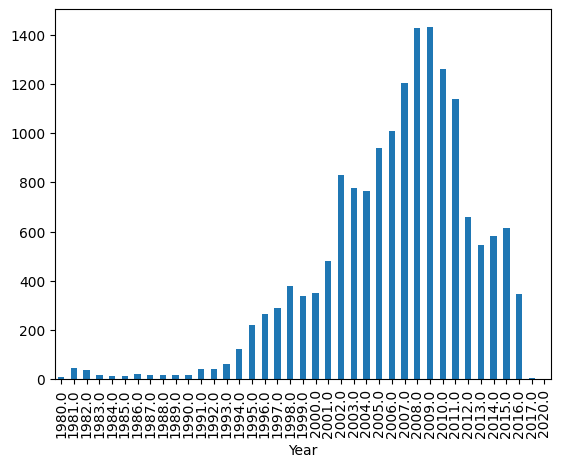

In [139]:
vg.groupby("Year")["Name"].count().sort_index().plot(kind="bar")

<Axes: xlabel='Year'>

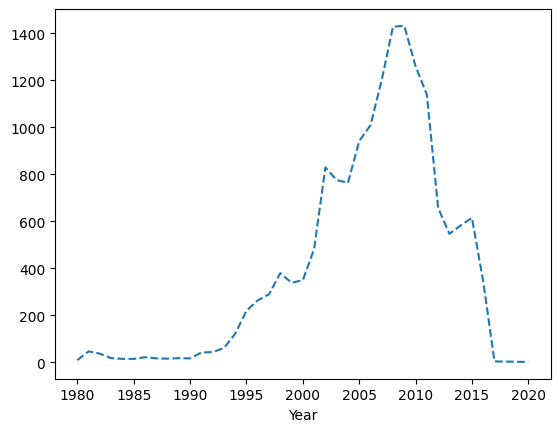

In [152]:
games_by_year.plot(kind="line",linestyle="dashed")

In [160]:
 # Q18. If a company wants to launch a new game, which genre and platform should they choose?
vg["Genre"].value_counts().sort_values(ascending=False)
vg.groupby("Genre")["Global_Sales"].mean().sort_values(ascending=False)

Genre
Platform        0.938341
Shooter         0.791885
Role-Playing    0.623233
Racing          0.586101
Sports          0.567319
Fighting        0.529375
Action          0.528100
Misc            0.465762
Simulation      0.452364
Puzzle          0.420876
Strategy        0.257151
Adventure       0.185879
Name: Global_Sales, dtype: float64

In [162]:
vg.groupby("Platform")["Global_Sales"].mean().sort_values(ascending=False)

Platform
GB      2.606633
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
X360    0.774672
2600    0.729925
PS3     0.720722
Wii     0.699404
N64     0.686144
XOne    0.662254
PS      0.610920
PS2     0.581046
WiiU    0.572448
3DS     0.486169
GBA     0.387470
DS      0.380254
GC      0.358561
XB      0.313422
SCD     0.311667
DC      0.307115
PC      0.269604
PSP     0.244254
WS      0.236667
SAT     0.194162
PSV     0.149952
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: Global_Sales, dtype: float64

In [157]:
vg["Platform"].value_counts().sort_values(ascending=False)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [164]:
vg.groupby(["Platform","Genre"])["Global_Sales"].mean().sort_values(ascending=False)

Platform  Genre       
NES       Shooter         5.088571
          Adventure       4.380000
GB        Role-Playing    4.201905
          Adventure       3.432000
NES       Platform        3.420714
                            ...   
3DO       Simulation      0.020000
          Puzzle          0.020000
NG        Sports          0.020000
PS4       Puzzle          0.020000
TG16      Shooter         0.020000
Name: Global_Sales, Length: 293, dtype: float64

In [168]:
# 🔹 Q19. Which publishers have consistent performers (low std deviation)?
vg.groupby("Publisher")["Global_Sales"].std().sort_values()

Publisher
Alvion                              0.0
Office Create                       0.0
Cloud Imperium Games Corporation    0.0
Nitroplus                           0.0
Flashpoint Games                    0.0
                                   ... 
fonfun                              NaN
iWin                                NaN
id Software                         NaN
inXile Entertainment                NaN
mixi, Inc                           NaN
Name: Global_Sales, Length: 578, dtype: float64

In [166]:
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,total_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75
